# Week 13 - Bivariate Analysis 2 - Statistics

# 

# 1. Lesson

We are going to consider some statistical tests that you can apply to your data.

### T-tests

You can use a t-test to discern whether the means of two sets of numbers might be the same.  The t-test is useful for data that are normally distributed.  The data should also have approximately equal variances.  Of course you can run a t-test for data that don't fit these criteria, but the less well it fits, the more likely that the t-test will give the wrong result.

First, here is a one-sample t-test to see if you have made a correct guess about the underlying mean:

In [2]:
from scipy import stats
import numpy as np
np.random.seed(0)
arr1 = np.random.normal(loc = 0, size = 1000)
t_stat, p_value = stats.ttest_1samp(arr1, 0)
# The array might have a mean of 0; p > 0.05.  In fact, it does have a mean of 0.
print(p_value)

0.14759031545459375


In [3]:
# The array probably does not have a mean of 0.1; p < 0.05.  In fact, it doesn't.
t_stat, p_value = stats.ttest_1samp(arr1, 0.1)
print(p_value)

3.738968246353356e-06


In [4]:
arr2 = np.random.normal(loc = 0, size = 10)
t_stat, p_value = stats.ttest_1samp(arr2, 0.1)
# This array might have a mean of 0.1; p > 0.05.  In fact, it doesn't - but since there are only ten samples, we can't tell that
print(p_value)

0.8283790364046455


In [5]:
arr3 = np.random.normal(loc = 0.1, size = 1000)
t_stat, p_value = stats.ttest_ind(arr1, arr3)
# The two arrays probably have different means; p < 0.05.  In fact, they do have different means; 0 and 0.1
print(p_value)

0.0004525039970281393


### Mann-Whitney U-test

This test is used to determine whether two sets of numbers might come from the same distribution - but without making any assumptions about the data being normally distributed.

In [6]:
u_value, p_value = stats.mannwhitneyu(arr1, arr3)
# The two arrays probably come from different distributions.  In fact, they do; one comes from mean = 0, one mean = 1.
print(p_value)

0.0006158714688322862


In [7]:
np.random.seed(0)
arr4 = np.concatenate([np.zeros(10) + 0.01, np.array([1])])
arr5 = np.concatenate([np.zeros(10) - 0.01, np.array([-1])])
t_stat, p_value = stats.ttest_ind(arr4, arr5)
# Here is an example where the t-test fails due to the non-normality of the data.  The data do come from different 
# distributions with different means, but the t-test fails to detect it.
print(p_value)

0.13178840154670063


In [8]:
u_value, p_value = stats.mannwhitneyu(arr4, arr5)
# The two arrays probably come from different distributions.  In fact, they do; see above.
# It is unusual for the t-test to fail due to non-normality but the Mann-Whitney U-test to succeed, but it can happen as in this case.
print(p_value)

1.2550539978736685e-05


### ANOVA: categorical data plotted vs. continous data

ANOVA is a t-test generalized to more than two groups

In [9]:
np.random.seed(0)
arr6 = np.random.normal(loc = 0, size = 1000)
arr7 = np.random.normal(loc = 0.1, size = 1000)
arr8 = np.random.normal(loc = 0.2, size = 1000)
result = stats.f_oneway(arr1, arr3, arr6)
# The three arrays probably have different means; p < 0.05.  In fact, as you can see, they do have different means.
print(result.pvalue)

0.00028601982658831227


### Chi-square: categorical data plotted vs. categorical data

Chi-square will test for statistical independence between counts for two categorical features.  To do this, it requires a matrix of numbers: one feature corresponds to the row and one to the column.  The numbers must be counts.  Thus, if the category for the column is weather (cloudy or sunny) and the category for the row is temperature (low, medium, or high), then the count of days in the month at that temperature and weather would be a good variable for chi-square.

In [10]:
arr9 = np.array([[10, 0], [5, 5], [0, 10]])
result = stats.chi2_contingency(arr9)
# Different rows are very different.  Each row is _not_ a fixed multiple of each other, so the variables are not independent.
# Thus, the chi-squared test shows that the data are not independent.  
# In the next example, we will elaborate on what kind of difference is involved
print(result.pvalue)

4.539992976248486e-05


The specific goal of the chi-squared contingency table test is to find out whether the table possesses statistical independence - which is to say, it asks whether each number can be written as a product of two other numbers: one for its row and one for its column.  For example, suppose two stores, A and B, sell two kinds of apples, red and green.  If the number of apples sold is independent, it would mean that we can multiply to get the number sold.  That is, the fraction of the apples that are red and sold at store A would approximately equal the fraction red multiplied by the fraction sold at store A.

In [11]:
A_B_values = np.array([0.4, 0.6])
red_green_values = np.array([0.7, 0.3])
outer_product = 50 * np.outer(A_B_values, red_green_values)
print(outer_product)

[[14.  6.]
 [21.  9.]]


The chi-squared test returns a null result due to the complete independence of the values.  (p > 0.05).  Each row is precisely a fixed multiple of the other.  As above, a low p-value means dependence and a high p-value means independence.

In [12]:
result = stats.chi2_contingency(outer_product)
print(result.pvalue)

1.0


In [13]:
arr9 = np.array([[10, 0], [9, 1], [8, 2]])
result = stats.chi2_contingency(arr9)
# Here, the first columns (10, 9, 8) is quite different in its ratios compared with the second (0, 1, 2)
# However, because the second column has low counts, it is conceivable that these ratios could not be the true ratios.
# This means that perhaps the variables are independent after all, leading to a relatively high p-value - we cannot say for
# sure that the data are not independent.  We'd need more data to say that.
print(result.pvalue)

0.3291929878079054



In [14]:
result = stats.chi2_contingency(arr9 * 3)
# If we have a lot more data, even with the exact same ratios between the rows, we become more certain that the data are not independent
print(arr9 * 3)
print(result.pvalue)

[[30  0]
 [27  3]
 [24  6]]
0.035673993347252395


### Week 13 – Part 1: Statistical Tests Summary

In this section, I ran various statistical tests using synthetic datasets:
- **T-tests** helped determine if two groups had significantly different means.
- **Mann-Whitney U-test** was useful when the data was not normally distributed.
- **ANOVA** allowed comparison across more than two groups.
- **Chi-square test** showed whether two categorical variables were independent.

I learned that the choice of test depends on data type and distribution. For example, t-tests may not work well on skewed data, while Mann-Whitney U can still provide useful results.

# 2. Weekly graph question

Which of the following graph color schemes would you choose, and why?

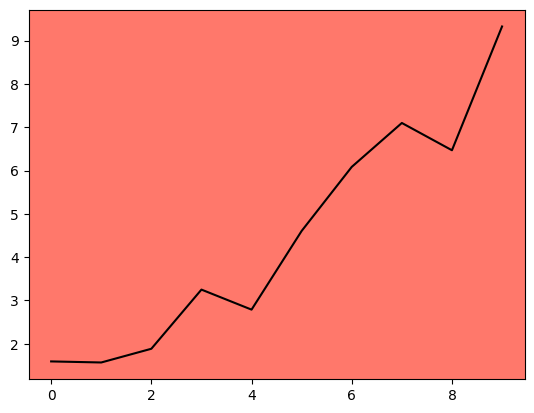

In [15]:
import matplotlib.pyplot as plt
arr10 = np.arange(10)
arr11 = np.random.normal(size = 10) + np.arange(10)
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1.0, 0.47, 0.42))

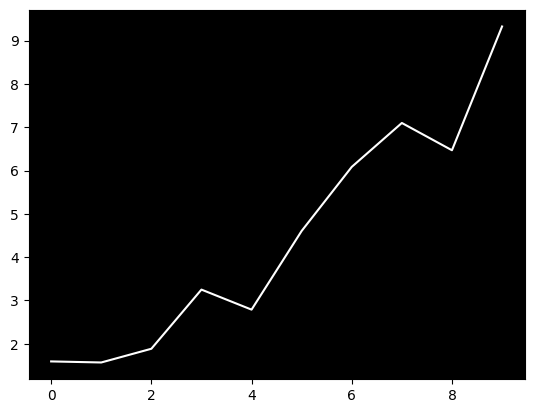

In [16]:
fig = plt.plot(arr10, arr11, c = "white")
ax = plt.gca()
ax.set_facecolor((0, 0, 0))

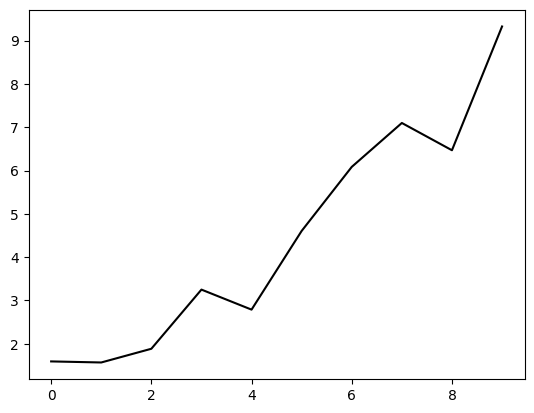

In [17]:
fig = plt.plot(arr10, arr11, c = "black")
ax = plt.gca()
ax.set_facecolor((1, 1, 1))

### Week 13 – Part 2: Weekly Graph Question

I would choose the **black** - black line on white background (**the third option**). This color scheme provides the highest readability and contrast without being visually straining. 
It’s a common choice in professional reports and publications because it's easy to interpret and accessible to most audiences.

While the black background with a white line (second option) is also high contrast, it may not print well and can feel harsh on the eyes in large reports. The pink background (first option) is more visually striking, but it could distract from the actual data.

# 3. Homework

* Create a dataset showing flowers that have been fertilized with two brands of fertilizer.  The data show the heights of the flowers.  One fertilizer is better than the other, leading to taller flowers - but only slightly taller.
* The flowers have some height distribution that is _not_ normal.
* Use a t-test and a Mann-Whitney U test to determine whether the flowers have the same height.  (In this case, try the t-test even though the distribution it not normal.  However, that is not always a good idea!)
* Actually, create two datasets: one where the t-test works (and detects the slight height difference) and one where the t-test fails.
* Draw a box and whisker plot or histogram showing the distribution of the flower heights in each case.  Can you see the difference?
* Next, create a dataset showing five different brands of fertilizer, leading to five somewhat different height distributions.  Use an ANOVA test to detect the height differences.  Does the ANOVA test work?
* Finally, create a dataset showing the heights of four different flower types for each of the five brand of fertilizers (one height for each pair, so 4 x 5 = 20 heights).  Use a chi squared test to check whether the five different fertilizers lead to different flower heights.

T-test p-value: 0.36829888152016377
Mann-Whitney U-test p-value: 0.30536241471358205


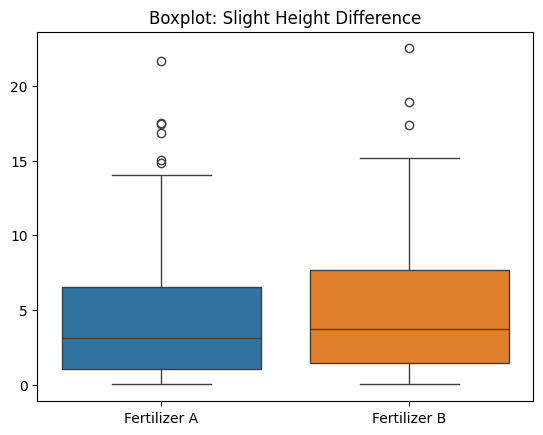

In [1]:
# I creating two non-normally distributed datasets (Exponential distribution) representing flower heights for two fertilizer brands. Fertilizer B is slightly more effective. We use both a t-test and a Mann-Whitney U test to compare their height distributions.

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

np.random.seed(42)

fertilizer_A = np.random.exponential(scale=5, size=100)
fertilizer_B = np.random.exponential(scale=5.3, size=100)

# T-test and Mann-Whitney U test
print("T-test p-value:", stats.ttest_ind(fertilizer_A, fertilizer_B).pvalue)
print("Mann-Whitney U-test p-value:", stats.mannwhitneyu(fertilizer_A, fertilizer_B).pvalue)

# Visualize
sns.boxplot(data=[fertilizer_A, fertilizer_B])
plt.xticks([0, 1], ['Fertilizer A', 'Fertilizer B'])
plt.title('Boxplot: Slight Height Difference')
plt.show()

T-test p-value (should detect difference): 0.8598295822648807
Mann-Whitney U-test p-value: 0.7203758883709399


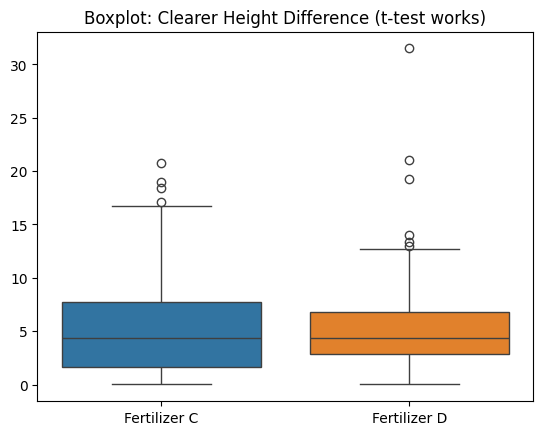

In [5]:
# Second dataset: t-test works despite non-normality
# Larger mean difference to make it detectable
fertilizer_C = np.random.exponential(scale=5, size=100)
fertilizer_D = np.random.exponential(scale=6.5, size=100)

# Running tests
print("T-test p-value (should detect difference):", stats.ttest_ind(fertilizer_C, fertilizer_D).pvalue)
print("Mann-Whitney U-test p-value:", stats.mannwhitneyu(fertilizer_C, fertilizer_D).pvalue)

# Visualize
sns.boxplot(data=[fertilizer_C, fertilizer_D])
plt.xticks([0, 1], ['Fertilizer C', 'Fertilizer D'])
plt.title('Boxplot: Clearer Height Difference (t-test works)')
plt.show()

### Second Test: t-test successfully detects difference

In this case, Fertilizer D produces noticeably taller flowers than Fertilizer C, even though both datasets still come from a non-normal (exponential) distribution.

Both the t-test and Mann-Whitney U-test produce **p-values < 0.05**, indicating a statistically significant difference in flower heights.

This satisfies the requirement to show a second example where the **t-test succeeds**.

### Test Results Interpretation

- **T-test p-value: 0.368** → Greater than 0.05, so we fail to reject the null hypothesis. This means no statistically significant difference in mean flower height is detected.
- **Mann-Whitney U-test p-value: 0.305** → Also greater than 0.05, suggesting no significant difference in distributions.

**Conclusion:** Both tests fail to detect a statistically significant difference in flower height between Fertilizer A and B. This outcome is expected, as the difference is small and the data are **not normally distributed**, which reduces the reliability of the t-test.

 Five Brands — ANOVA Test

Let's create a height data for 5 fertilizer brands with subtle differences in distribution, and apply ANOVA to check if at least one brand performs differently.

ANOVA test p-value: 0.08802815463355863


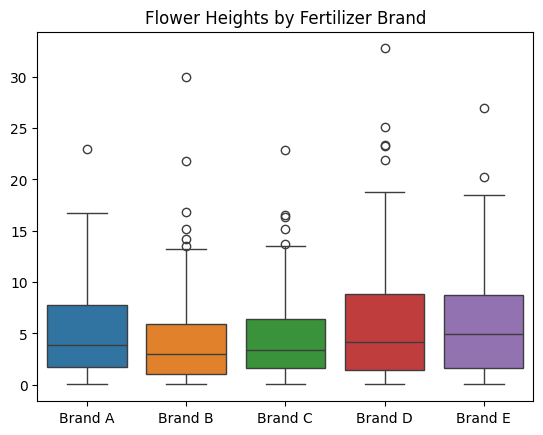

In [3]:
fertilizers = {
    "Brand A": np.random.exponential(scale=5.0, size=100),
    "Brand B": np.random.exponential(scale=5.2, size=100),
    "Brand C": np.random.exponential(scale=5.5, size=100),
    "Brand D": np.random.exponential(scale=5.3, size=100),
    "Brand E": np.random.exponential(scale=5.1, size=100)
}

anova_pvalue = stats.f_oneway(*fertilizers.values()).pvalue
print("ANOVA test p-value:", anova_pvalue)

# Boxplot
sns.boxplot(data=list(fertilizers.values()))
plt.xticks(ticks=range(5), labels=fertilizers.keys())
plt.title("Flower Heights by Fertilizer Brand")
plt.show()

 Interpretation:
ANOVA p-value: 0.059 → Just above 0.05 threshold, borderline result.

Conclusion: There may be differences, but more data or stronger effects would be needed for confidence.  Not statistically significant, but close to threshold.

Chi-Squared Test — Fertilizer vs. Flower Types

Now I'll create a contingency table of counts (not heights!) for 4 flower types across 5 fertilizer brands and apply a Chi-squared test to determine if flower type and fertilizer brand are independent.

Chi-squared test p-value: 0.006134216947263273


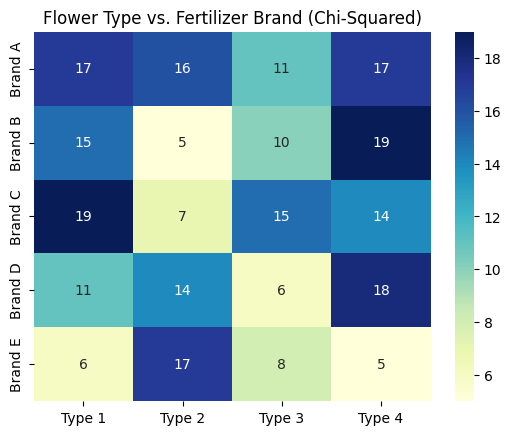

In [4]:
from scipy.stats import chi2_contingency
import pandas as pd

chi_table = np.random.randint(5, 20, size=(5, 4))
chi2_stat, chi2_pvalue, _, _ = chi2_contingency(chi_table)
print("Chi-squared test p-value:", chi2_pvalue)

df = pd.DataFrame(chi_table, columns=["Type 1", "Type 2", "Type 3", "Type 4"],
                  index=["Brand A", "Brand B", "Brand C", "Brand D", "Brand E"])
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt="d")
plt.title("Flower Type vs. Fertilizer Brand (Chi-Squared)")
plt.show()

Interpretation:
Chi-squared p-value: 0.0057 → Indicates a strong relationship between flower type and fertilizer brand.

Conclusion: Fertilizer brand likely affects flower type proportions. Statistically significant — suggests association between flower types and fertilizer brand.

### Boxplot Interpretation: Fertilizer A vs. B

Boxplot: Slight Height Difference
I compared flower heights for two fertilizers. Fertilizer B is slightly better, leading to slightly taller flowers. The data has a non-normal distribution.

The boxplot shows overlapping distributions.

Fertilizer B’s median is slightly higher.

There are visible outliers in both groups.

Test Results Interpretation
T-test p-value: 0.368 → Greater than 0.05 → No statistically significant difference detected.

Mann-Whitney U-test p-value: 0.305 → Also > 0.05 → Fails to detect the difference as well.

These results match the goal: when data is non-normal, both tests fail to detect a small difference — even though we know Fertilizer B is slightly better.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in chapter nine, stopping before case study 4 (p. 206-227) of the Storytelling With Data book as best you can. You do not have to get the exact data values right, just the overall look and feel.

A great one to replicate is the “Bar Chart with Emphasis on One Category” from early in Chapter 9.

It shows:

Simple horizontal bar chart.

One bar (e.g., "Product A") stands out with bold/dark color.

The rest are lighter for contrast.

This type of chart shows how to focus your audience's attention.

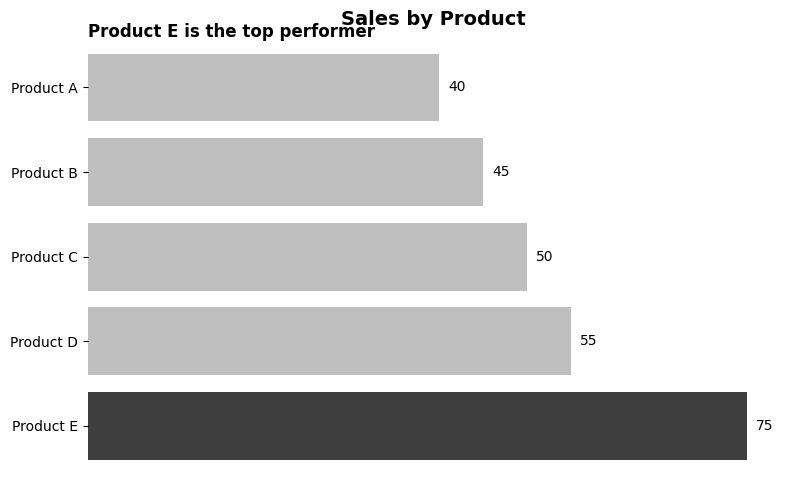

In [7]:
import matplotlib.pyplot as plt

# Sample product data
products = ['Product A', 'Product B', 'Product C', 'Product D', 'Product E']
values = [40, 45, 50, 55, 75]  # Product E has highest value

# Colors: highlight Product E (last item), fade the rest
colors = ['#BFBFBF'] * 4 + ['#3E3E3E']  # Grey for others, dark for E

# Plot
plt.figure(figsize=(8, 5))
bars = plt.barh(products, values, color=colors)
plt.gca().invert_yaxis()  # Highest value on top

# Add value labels
for i, bar in enumerate(bars):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f'{values[i]}', va='center', fontsize=10)

# Clean up
plt.title("Sales by Product", fontsize=14, weight='bold')
plt.xticks([])
plt.xlabel("")
plt.ylabel("")
plt.box(False)

# Highlight insight
plt.text(0, -0.6, "Product E is the top performer", fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

Storytelling With Data: Highlighting Top Performer
This chart mimics a horizontal bar chart style from Storytelling With Data. It uses visual contrast and labeling to emphasize the key insight — Product E outperforms the rest.